# Linear Regression in StatsModels - Lab

## Introduction

It's time to apply the StatsModels skills from the previous lesson! In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:

* Perform a linear regression using StatsModels
* Evaluate a linear regression model using StatsModels
* Interpret linear regression coefficients using StatsModels

## Let's Get Started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

The columns in this dataset are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

## Step 1: Exploratory Data Analysis

In [44]:
# Load necessary libraries and import the data
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("advertising.csv")

In [45]:
# Check the columns and first few rows
# Display the first few rows
df.head()



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [46]:
# Generate summary statistics for data with .describe()
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Based on what you have seen so far, describe the contents of this dataset. Remember that our business problem is asking us to build a model that predicts sales.

In [47]:
# Your answer here
""" 
The dataset consists of 200 observations on advertising spend across TV, radio, and newspaper, along with corresponding sales figures. TV advertising has the highest average spend ($147K) and the widest range ($0.7K – $296.4K), suggesting it might be the most influential factor in driving sales, which range from 1.6K to 27K units (average 14K). Radio and newspaper ad spends are lower ($23K and $30K on average) and more variable, indicating a potentially weaker or inconsistent impact. To determine which channel has the strongest relationship with sales, we will compute correlations and fit a linear regression model.
"""

' \nThe dataset consists of 200 observations on advertising spend across TV, radio, and newspaper, along with corresponding sales figures. TV advertising has the highest average spend ($147K) and the widest range ($0.7K – $296.4K), suggesting it might be the most influential factor in driving sales, which range from 1.6K to 27K units (average 14K). Radio and newspaper ad spends are lower ($23K and $30K on average) and more variable, indicating a potentially weaker or inconsistent impact. To determine which channel has the strongest relationship with sales, we will compute correlations and fit a linear regression model.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from `head()`.
    
</details>

Now, use scatter plots to plot each predictor (TV, radio, newspaper) against the target variable.

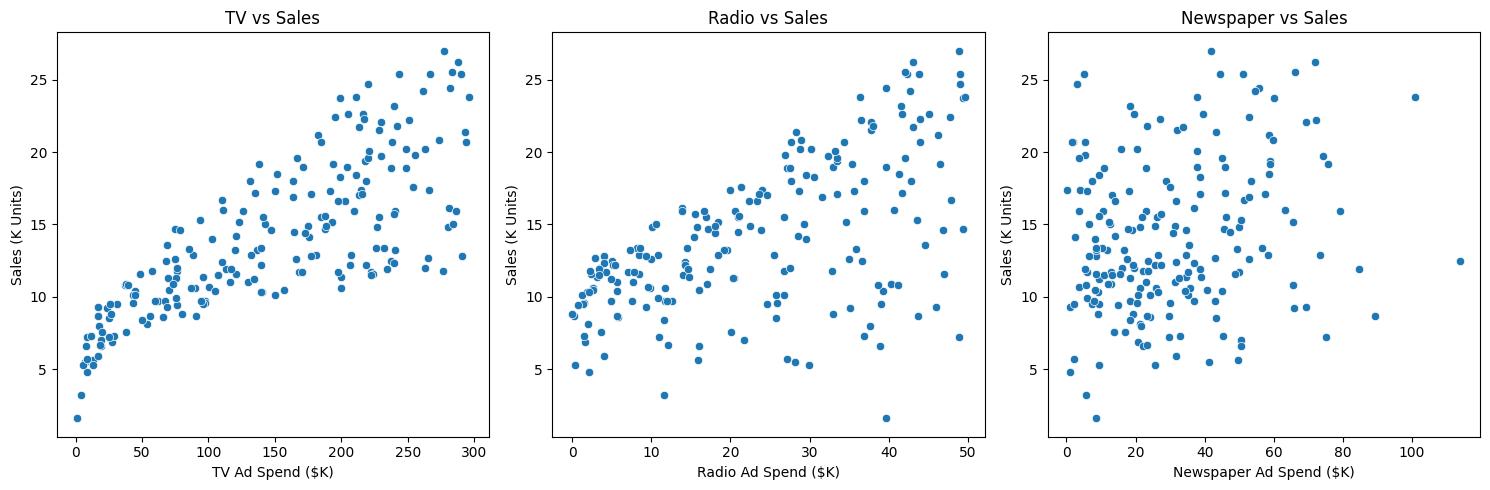

In [48]:
# Visualize the relationship between the preditors and the target using scatter plots
# Set the figure size
plt.figure(figsize=(15, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x=df["TV"], y=df["sales"])
plt.title("TV vs Sales")
plt.xlabel("TV Ad Spend ($K)")
plt.ylabel("Sales (K Units)")

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x=df["radio"], y=df["sales"])
plt.title("Radio vs Sales")
plt.xlabel("Radio Ad Spend ($K)")
plt.ylabel("Sales (K Units)")

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x=df["newspaper"], y=df["sales"])
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper Ad Spend ($K)")
plt.ylabel("Sales (K Units)")

plt.tight_layout()
plt.show()


Does there appear to be a linear relationship between these predictors and the target?

In [49]:
# Record your observations on linearity here 
""" 
Observations on Linearity:
TV vs. Sales:

There is a strong positive linear relationship between TV ad spend and sales.

As TV spending increases, sales also increase in a consistent pattern.


Radio vs. Sales:

A moderate positive relationship is visible, though more scattered than TV.

Sales tend to increase with radio spending, but the pattern is less clear.


Newspaper vs. Sales:

There appears to be little to no strong linear relationship between newspaper spend and sales.

The data points are widely dispersed, showing weak or inconsistent influence on sales.


Conclusion:
TV advertising has the strongest linear relationship with sales, followed by radio, while newspaper ads appear to have the weakest impact. A linear regression model will likely show TV as the most significant predictor.
"""

' \nObservations on Linearity:\nTV vs. Sales:\n\nThere is a strong positive linear relationship between TV ad spend and sales.\n\nAs TV spending increases, sales also increase in a consistent pattern.\n\n\nRadio vs. Sales:\n\nA moderate positive relationship is visible, though more scattered than TV.\n\nSales tend to increase with radio spending, but the pattern is less clear.\n\n\nNewspaper vs. Sales:\n\nThere appears to be little to no strong linear relationship between newspaper spend and sales.\n\nThe data points are widely dispersed, showing weak or inconsistent influence on sales.\n\n\nConclusion:\nTV advertising has the strongest linear relationship with sales, followed by radio, while newspaper ads appear to have the weakest impact. A linear regression model will likely show TV as the most significant predictor.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

`TV` seems to be a good predictor because it has the most linear relationship with sales.

`radio` also seems to have a linear relationship, but there is more variance than with `TV`. We would expect a model using `radio` to be able to predict the target, but not as well as a model using `TV`.

`newspaper` has the least linear-looking relationship. There is a lot of variance as well. It's not clear from this plot whether a model using `newspaper` would be able to predict the target.
    
</details>

## Step 2: Run a Simple Linear Regression with `TV` as the Predictor

As the analysis above indicates, `TV` looks like it has the strongest relationship with `sales`. Let's attempt to quantify that using linear regression.

In [50]:
# Import libraries
import statsmodels.api as sm

# Determine X and y values
X = df['TV']  # Independent variable
y = df['sales']  # Dependent variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Create an OLS model
model_tv = sm.OLS(y, X).fit()



In [51]:
# Get model results
model_tv

# Display results summary
model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.47e-42
Time:                        05:50:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 3: Evaluate and Interpret Results from Step 2

How does this model perform overall? What do the coefficients say about the relationship between the variables?

In [52]:
# Your answer here
""" 
Model Performance:

R-squared = 0.612 → About 61.2% of the variance in sales is explained by TV ad spending.

While this suggests a strong relationship, there is still 38.8% of variance left unexplained, indicating that other factors also impact sales.


Interpretation of Coefficients:

Intercept (const) = 7.0326

This means that if TV ad spend were $0K, the expected sales would still be 7.03K units.

TV Coefficient = 0.0475

For every additional $1K spent on TV ads, sales increase by 0.0475K (or 47.5 units) on average.

P-value for TV = 0.000

Since this is less than 0.05, TV ad spending is a statistically significant predictor of sales.


Conclusion:

The TV advertising budget has a significant positive effect on sales.

However, with an R² of 0.612, other factors (radio, newspaper, or external factors) likely play a role.

A multiple regression model with additional predictors might improve the model’s accuracy.
"""

' \nModel Performance:\n\nR-squared = 0.612 → About 61.2% of the variance in sales is explained by TV ad spending.\n\nWhile this suggests a strong relationship, there is still 38.8% of variance left unexplained, indicating that other factors also impact sales.\n\n\nInterpretation of Coefficients:\n\nIntercept (const) = 7.0326\n\nThis means that if TV ad spend were $0K, the expected sales would still be 7.03K units.\n\nTV Coefficient = 0.0475\n\nFor every additional $1K spent on TV ads, sales increase by 0.0475K (or 47.5 units) on average.\n\nP-value for TV = 0.000\n\nSince this is less than 0.05, TV ad spending is a statistically significant predictor of sales.\n\n\nConclusion:\n\nThe TV advertising budget has a significant positive effect on sales.\n\nHowever, with an R² of 0.612, other factors (radio, newspaper, or external factors) likely play a role.\n\nA multiple regression model with additional predictors might improve the model’s accuracy.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Overall the model and coefficients are **statistically significant**, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.61 i.e. **61% of the variance in the target variable can be explained by TV spending**.

The intercept is about 7.0, meaning that if we spent 0 on TV, we would expect sales of about 7k widgets (the units of `sales` are in thousands of widgets).

The `TV` coefficient is about 0.05, meaning that **for each additional &dollar;1k spent on TV (the units of `TV` are in thousands of dollars), we would expect to sell an additional 50 widgets**. (More precisely, 47.5 widgets.)

Note that all of these coefficients represent associations rather than causation. It's possible that better sales are what leads to more TV spending! Either way, `TV` seems to have a strong relationship with `sales`.

</details>

## Step 4: Visualize Model with `TV` as Predictor

Create at least one visualization that shows the prediction line against a scatter plot of `TV` vs. sales, as well as at least one visualization that shows the residuals.

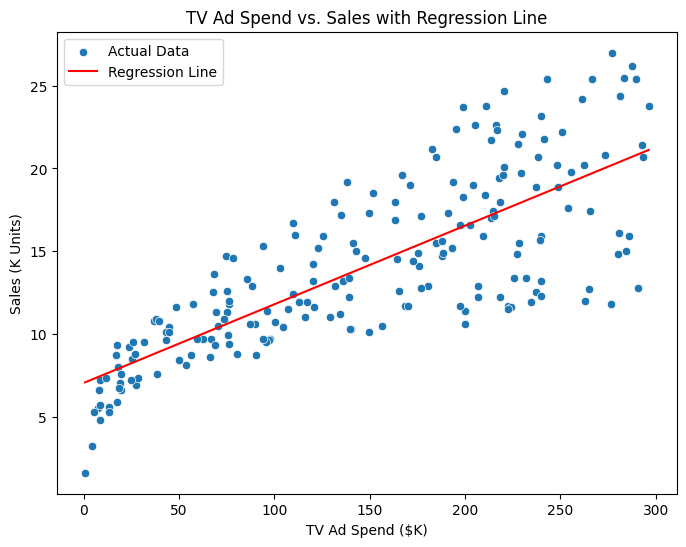

In [53]:
# Plot the model fit (scatter plot and regression line)
# Scatter plot of TV vs. Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["TV"], y=df["sales"], label="Actual Data")

# Regression line
X_range = np.linspace(df["TV"].min(), df["TV"].max(), 100)
y_pred = model_tv.params["const"] + model_tv.params["TV"] * X_range 
plt.plot(X_range, y_pred, color="red", label="Regression Line")

# Labels and title
plt.xlabel("TV Ad Spend ($K)")
plt.ylabel("Sales (K Units)")
plt.title("TV Ad Spend vs. Sales with Regression Line")
plt.legend()
plt.show()


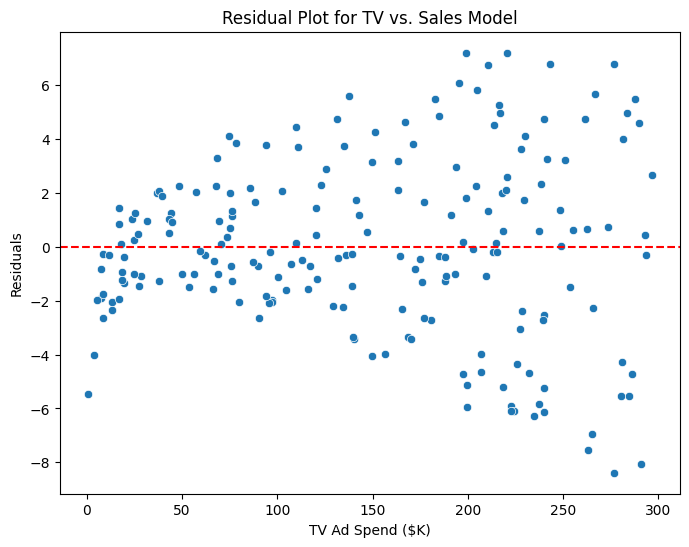

In [54]:
# Plot the model residuals
# Residuals calculation
residuals = model_tv.resid

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["TV"], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0

# Labels and title
plt.xlabel("TV Ad Spend ($K)")
plt.ylabel("Residuals")
plt.title("Residual Plot for TV vs. Sales Model")
plt.show()


## Step 5: Repeat Steps 2-4 with `radio` as Predictor

Compare and contrast the model performance, coefficient value, etc. The goal is to answer the business question described above.

In [55]:
# Determine X and y values
X_radio = df['radio']  # Independent variable (predictor)
y = df['sales']  # Dependent variable (Target)

# Add a constant for the intercept
X_radio = sm.add_constant(X_radio)


# Create an OLS model
model_radio = sm.OLS(y, X_radio).fit()


# Run model
model_radio


# Display results
model_radio.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           4.35e-19
Time:                        05:50:17   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

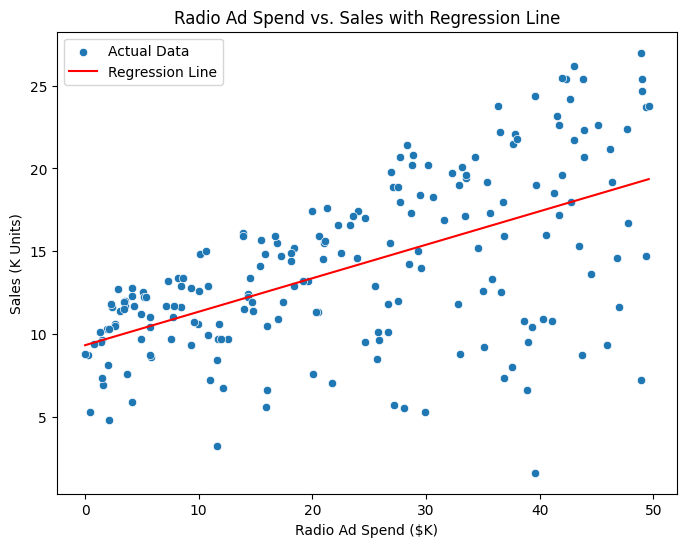

In [56]:
# Visualize model fit
# Scatter plot of Radio vs. Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["radio"], y=df["sales"], label="Actual Data")

# Regression line
X_range = np.linspace(df["radio"].min(), df["radio"].max(), 100)
y_pred = model_radio.params["const"] + model_radio.params["radio"] * X_range  # Predicted sales

plt.plot(X_range, y_pred, color="red", label="Regression Line")  # Best-fit line

# Labels and title
plt.xlabel("Radio Ad Spend ($K)")
plt.ylabel("Sales (K Units)")
plt.title("Radio Ad Spend vs. Sales with Regression Line")
plt.legend()
plt.show()

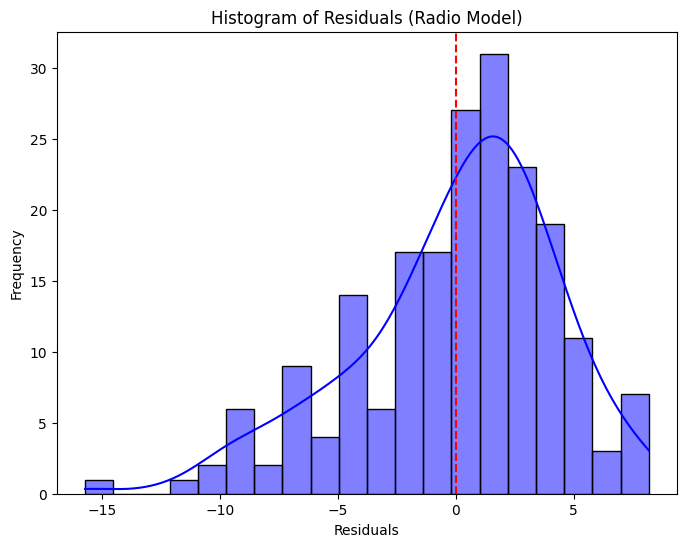

In [57]:
# Visualize residuals
# Calculate predicted values
y_pred_radio = model_radio.predict(X_radio)

# Calculate residuals
residuals_radio = y - y_pred_radio

plt.figure(figsize=(8, 6))
sns.histplot(residuals_radio, bins=20, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="dashed")  # Mean residual line
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Radio Model)")
plt.show()

In [58]:
# Your interpretation here
""" 
(Radio as Predictor)
Model Performance (R² and Adjusted R²):

The R² value is 0.332, meaning that 33.2% of the variation in sales is explained by radio ad spend.

This is significantly lower than the TV model (R² = 0.612), indicating that radio is a weaker predictor of sales compared to TV.


Coefficients Interpretation:

Intercept (const) = 9.3116: This means that when radio ad spend is $0K, the expected sales would be 9.3116K units.

Radio coefficient = 0.2025: For every additional $1K spent on radio advertising, sales increase by 0.2025K units (or 202.5 units).

The p-value for radio is 0.000, which means the predictor is statistically significant.


Residual Diagnostics:

Omnibus and Jarque-Bera tests have very low p-values (0.000 and 1.75e-05, respectively), suggesting that residuals are not perfectly normally distributed.

Durbin-Watson statistic is 1.946, indicating no significant autocorrelation in residuals.


Conclusion:
The model suggests that radio ad spend has a positive and statistically significant effect on sales, but it is not as strong as TV ad spend (since R² is lower).

The next step would be to run a multiple regression model with TV, radio, and newspaper combined to see if adding more predictors improves the model.

"""

' \n(Radio as Predictor)\nModel Performance (R² and Adjusted R²):\n\nThe R² value is 0.332, meaning that 33.2% of the variation in sales is explained by radio ad spend.\n\nThis is significantly lower than the TV model (R² = 0.612), indicating that radio is a weaker predictor of sales compared to TV.\n\n\nCoefficients Interpretation:\n\nIntercept (const) = 9.3116: This means that when radio ad spend is $0K, the expected sales would be 9.3116K units.\n\nRadio coefficient = 0.2025: For every additional $1K spent on radio advertising, sales increase by 0.2025K units (or 202.5 units).\n\nThe p-value for radio is 0.000, which means the predictor is statistically significant.\n\n\nResidual Diagnostics:\n\nOmnibus and Jarque-Bera tests have very low p-values (0.000 and 1.75e-05, respectively), suggesting that residuals are not perfectly normally distributed.\n\nDurbin-Watson statistic is 1.946, indicating no significant autocorrelation in residuals.\n\n\nConclusion:\nThe model suggests that ra

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Same as with `TV`, the model using `radio` to predict `sales` as well as its parameters are **statistically significant** (p-values well below 0.05).

However, this model explains less of the variance. It only **explains about 33% of the variance in `sales`**, compared to about 61% explained by `TV`. If our main focus is the percentage of variance explained, this is a worse model than the `TV` model.

On the other hand, the coefficient for `radio` is much higher. **An increase of &dollar;1k in radio spending is associated with an increase of sales of about 200 widgets!** This is roughly 4x the increase of widget sales that we see for `TV`.

Visualizing this model, it doesn't look much different from the `TV` model.
    
So, how should we answer the business question? Realistically, you would need to return to your stakeholders to get a better understanding of what they are looking for. Do they care more about the variable that explains more variance, or do they care more about where an extra &dollar;1k of advertising spending is likely to make the most difference?

</details>

## Step 6: Repeat Steps 2-4 with `newspaper` as Predictor

Once again, use this information to compare and contrast.

In [59]:
# Define X and y
X_newspaper = df['newspaper']
y = df['sales']

# Add a constant to the model
X_newspaper = sm.add_constant(X_newspaper)

# Fit the OLS model
model_newspaper = sm.OLS(y, X_newspaper).fit()


# Run model
model_newspaper

# Display results
model_newspaper.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 24 Mar 2025   Prob (F-statistic):            0.00115
Time:                        05:50:18   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

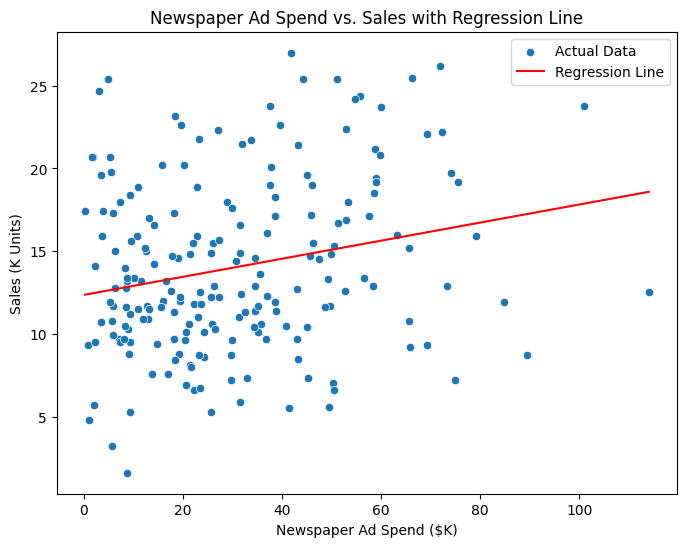

In [60]:
# Visualize model fit
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['newspaper'], y=df['sales'], label="Actual Data")
sns.lineplot(x=df['newspaper'], y=model_newspaper.predict(X_newspaper), color='red', label="Regression Line")

plt.xlabel("Newspaper Ad Spend ($K)")
plt.ylabel("Sales (K Units)")
plt.title("Newspaper Ad Spend vs. Sales with Regression Line")
plt.legend()
plt.show()


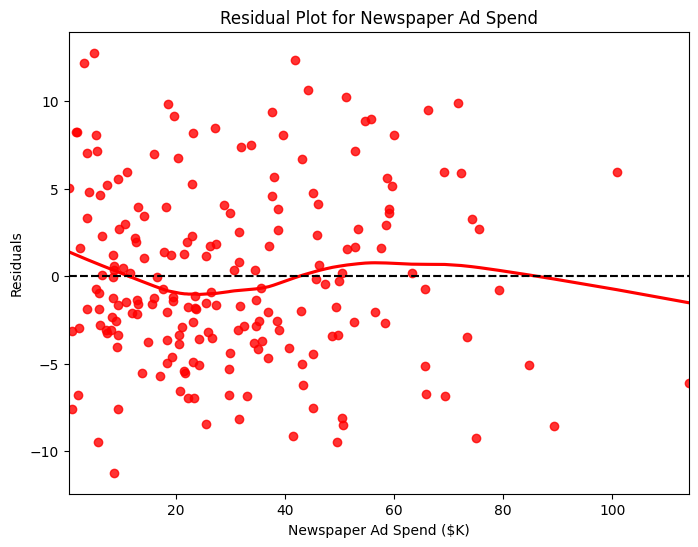

In [61]:
# Visualize residuals
# Residual plot
plt.figure(figsize=(8,6))
sns.residplot(x=df['newspaper'], y=model_newspaper.resid, lowess=True, color='red')

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Newspaper Ad Spend ($K)")
plt.ylabel("Residuals")
plt.title("Residual Plot for Newspaper Ad Spend")
plt.show()


In [62]:
# Your interpretation here
""" 
Model Performance (R-squared)

The R-squared value is 0.052, meaning that only 5.2% of the variance in sales is explained by newspaper ad spend.

This is significantly lower than the R-squared values for TV (0.612) and radio (0.332), indicating that newspaper ad spend is a weak predictor of sales.


Statistical Significance (p-value for newspaper)

The p-value is 0.001, which is less than 0.05, meaning the newspaper ad spend has a statistically significant relationship with sales.

However, even though it's significant, the low R-squared value suggests it's not practically useful.


Coefficient (newspaper)

The coefficient for newspaper is 0.0547, meaning that for every additional $1,000 spent on newspaper ads, sales increase by approximately 0.0547K units (or 54.7 units).

This is a much smaller impact compared to TV and radio.


Intercept (const)

The constant 12.3514 suggests that when there is zero newspaper ad spend, the baseline sales level is about 12.35K units.


Model Diagnostics

The Durbin-Watson statistic is 1.983, which is close to 2, indicating no strong autocorrelation in residuals.

The Omnibus (6.231) and Jarque-Bera (5.483) tests indicate slight deviations from normality, but nothing extreme.

The AIC (1221) and BIC (1227) are the highest among the three models, which suggests a worse model fit compared to TV and radio.


Conclusion
The newspaper ad spend has a statistically significant effect on sales, but the effect size is small, and the overall explanatory power of the model is very weak.

TV and radio ad spends are much stronger predictors of sales than newspaper ad spend.

Recommendation: Companies should prioritize TV and radio ad spend over newspaper ads to maximize sales impact.

"""

" \nModel Performance (R-squared)\n\nThe R-squared value is 0.052, meaning that only 5.2% of the variance in sales is explained by newspaper ad spend.\n\nThis is significantly lower than the R-squared values for TV (0.612) and radio (0.332), indicating that newspaper ad spend is a weak predictor of sales.\n\n\nStatistical Significance (p-value for newspaper)\n\nThe p-value is 0.001, which is less than 0.05, meaning the newspaper ad spend has a statistically significant relationship with sales.\n\nHowever, even though it's significant, the low R-squared value suggests it's not practically useful.\n\n\nCoefficient (newspaper)\n\nThe coefficient for newspaper is 0.0547, meaning that for every additional $1,000 spent on newspaper ads, sales increase by approximately 0.0547K units (or 54.7 units).\n\nThis is a much smaller impact compared to TV and radio.\n\n\nIntercept (const)\n\nThe constant 12.3514 suggests that when there is zero newspaper ad spend, the baseline sales level is about 12.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Technically our model and coefficients are **still statistically significant** at an alpha of 0.05, but the p-values are much higher. For both the F-statistic (overall model significance) and the `newspaper` coefficient, our p-values are about 0.001, meaning that there is about a 0.1% chance that a variable with _no linear relationship_ would produce these statistics. That is a pretty small false positive rate, so we'll consider the model to be statistically significant and move on to interpreting the other results.

The R-Squared here is the smallest we have seen yet: 0.05. This means that **the model explains about 5% of the variance in `sales`**. 5% is well below both the `radio` model (33%) and the `TV` model (61%).

The coefficient is also small, though similar to the `TV` coefficient. **An increase of &dollar;1k in newspaper spending is associated with about 50 additional widget sales** (more precisely, about 54.7). This is still much less than the 200-widget increase associated with &dollar;1k of additional `radio` spending.

Visualizing this model, the best-fit line is clearly not a strong predictor. On the other hand, the residuals exhibit _homoscedasticity_, meaning that the distribution of the residuals doesn't vary much based on the value of `newspaper`. This contrasts with the `radio` and `TV` residuals which exhibit a "cone" shape, where the errors are larger as the x-axis increases. Homoscedasticity of residuals is a good thing, which we will describe more in depth when we discuss regression assumptions.

Once again, how should we answer the business question? Regardless of the framing, it is unlikely that `newspaper` is the answer that your stakeholders want. This model has neither the highest R-Squared nor the highest coefficient.

</details>

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used StatsModels to perform linear regression and evaluated your models using statistical metrics as well as visualizations. You also reached a conclusion about how you would answer a business question using linear regression.